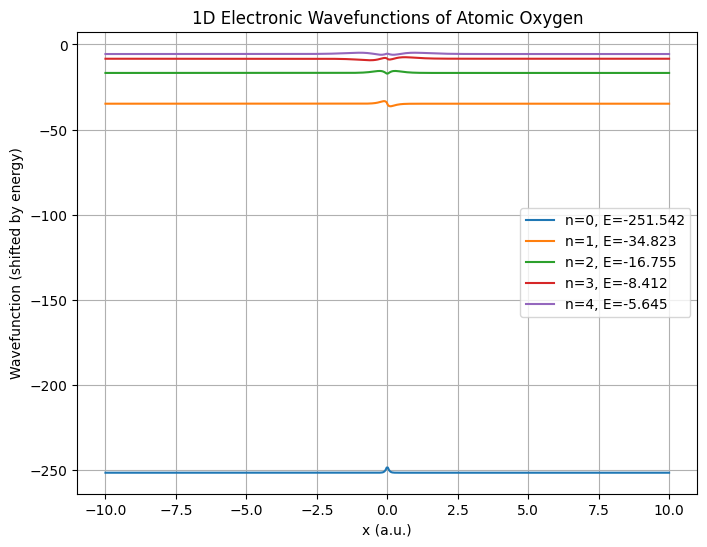

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Constants
hbar = 1.0  # Reduced Planck's constant (atomic units)
m = 1.0     # Electron mass (atomic units)
Z = 8.0     # Nuclear charge for oxygen
a = 0.5     # Soft-core parameter to prevent singularity

# Spatial grid
N = 500     # Number of grid points
x_max = 10.0  # Maximum |x| value
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]  # Grid spacing

# Potential: Soft-core Coulomb potential
V = -Z / np.sqrt(x**2)

# Construct Hamiltonian using finite differences
diag = hbar**2 / (m * dx**2) + V  # Main diagonal
off_diag = -hbar**2 / (2 * m * dx**2) * np.ones(N - 1)  # Off-diagonals

# Solve for eigenvalues and eigenvectors
energies, wavefunctions = eigh_tridiagonal(diag, off_diag)

# Normalize wavefunctions
dx_norm = np.sqrt(np.sum(wavefunctions**2, axis=0) * dx)
wfn_norm = wavefunctions / dx_norm

# Plot the first few wavefunctions
num_states_to_plot = 5
plt.figure(figsize=(8, 6))
for i in range(num_states_to_plot):
    plt.plot(x, wfn_norm[:, i] + energies[i], label=f"n={i}, E={energies[i]:.3f}")

plt.xlabel("x (a.u.)")
plt.ylabel("Wavefunction (shifted by energy)")
plt.title("1D Electronic Wavefunctions of Atomic Oxygen")
plt.legend()
plt.grid()
plt.show()